<a href="https://colab.research.google.com/github/welricsson/portfolio/blob/master/Manipulando_Arquivos_PDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Biblioteca PDF Plumber

É muito comum termos de lidar com arquivos no formato PDF na nossa rotina de trabalho. Criamos, editamos, acessamos e compartilhamos arquivos nesse formato, que muitas vezes, fazem parte de nossas atividades primordiais na empresa.

<center><img width="30%" src="https://image.freepik.com/free-vector/group-people-working-together_52683-28615.jpg"></center>

Com essa biblioteca Python, é possível facilitar esse processo. A biblioteca [PDF Plumber](https://github.com/jsvine/pdfplumber) possui uma grande gama de funções, e aqui nós vamos começar a ver algumas dessas funções.

Para isso, vamos precisar de um arquivo pdf. Optei por um documento disponibilizado publicamente pela Vale que trata dos resultados trimestrais de desempenho do primeiro trimestre. O arquivo pode ser baixado diretamente no site da Vale: [Resultados Trimestrais.](http://www.vale.com/brasil/PT/investors/information-market/quarterly-results/Paginas/default.aspx) Mas, para facilitar, também deixei ele disponível no meu perfil do [GitHub](https://github.com/welricsson/datasets/blob/main/desempenho_da_vale_no_1t21_brl_pt.pdf).

Vamos fazer um processo mais robusto, e nos acostumar a montar e acessar nosso Google Drive, pois esse processo vai facilitar a nossa vida quando formos lidar com mais arquivos de uma vez.

Outro detalhe importante é que, nativamente, o Google Colab não possui essa biblioteca instalada, então nós precisamos instalar a mesma no nosso ambiente.

Para isso, vamos utilizar o gerenciador de pacotes `pip`, e com o comando `install` vamos instalar a biblioteca.



In [1]:
# instalando a biblioteca
!pip install pdfplumber -q

     |████████████████████████████████| 45 kB 3.5 MB/s 
     |████████████████████████████████| 5.6 MB 12.4 MB/s 
     |████████████████████████████████| 138 kB 72.7 MB/s 
     |████████████████████████████████| 1.9 MB 33.4 MB/s 


Agora que a biblioteca foi instalada, basta fazer a importação, e usar.

Também vamos precisar importar a biblioteca `os` para manipular os arquivos, e o `drive` para montar e acessar nosso Google Drive, e a biblioteca Pandas onde iremos carregar os dados.

In [2]:
# importando os pacotes necessários
import pdfplumber
import os
from google.colab import drive
import pandas as pd

Pronto! Agora é só montar nosso drive e buscar os arquivos.

In [3]:
# montando o drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Verificando o conteúdo do nosso drive, podemos ver que o arquivo `desempenho_da_vale_no_1t21_brl_pt.pdf` está lá, pronto para ser usado. Vamos carregá-lo e ver como essa biblioteca funciona na prática.

In [4]:
# verificando o conteúdo do drive
!ls '/content/gdrive/MyDrive/datasets/pdf'

desempenho_da_vale_no_1t21_brl_pt.pdf


### pdfplumber.open()

Para abrir um arquivo, vamos associá-lo a uma variável, para que ele possa ser facilmente acessado depois.

Utilizamos o comando `pdfplumber.open('caminho/do/meu/arquivo')` com o caminho do arquivo dentro dos parênteses, dentro de aspas, simples ou duplas.

In [5]:
# abrindo o documento
pdf = pdfplumber.open('/content/gdrive/MyDrive/datasets/pdf/desempenho_da_vale_no_1t21_brl_pt.pdf')

### pages
Para acessar as páginas existentes no arquivo, utilizamos a função `pages`.

Ela retorna uma lista com as páginas do arquivo.

In [6]:
# ver o número de páginas do pdf:
pdf.pages[-1]

<Page:16>

Ao fazer qualquer manipulação, precisamos sempre identificar a página em que isso está acontecendo, mesmo que o documento possua apenas uma página.

Para isso, utilizaremos a função `pages`, passando como argumento o número da página que desejamos manipular, lembrando sempre que começamos a contar a partir do 0.

In [7]:
# selecionando os dados da primeira página
page1 = pdf.pages[0]
print(page1.extract_text())

 
 
Planta de filtragem de rejeitos no complexo de Vargem Grande, entregue em março de 2021 
DESEMPENHO DA VALE NO 
 
1T21


### metadata
Metadados, de forma simples, são dados sobre outros dados. No nosso caso, são dados sobre o nosso arquivo, como o autor, data de criação, palavras chaves, título, etc.

É possível extrair esses dados sobre nossos arquivos com facilidade usando a função `metadata` do pdfplumber.

In [10]:
# coletando os metadados do arquivo
pdf.metadata

{'Author': 'Mariano Szachtman',
 'CreationDate': "D:20210426222436-03'00'",
 'Creator': 'Microsoft® Word para Microsoft 365',
 'ModDate': "D:20210426222436-03'00'",
 'Producer': 'Microsoft® Word para Microsoft 365'}

Vamos extrair os dados da tabela contida na página 16. Nesta página contém uma tabela como podem ver abaixo:

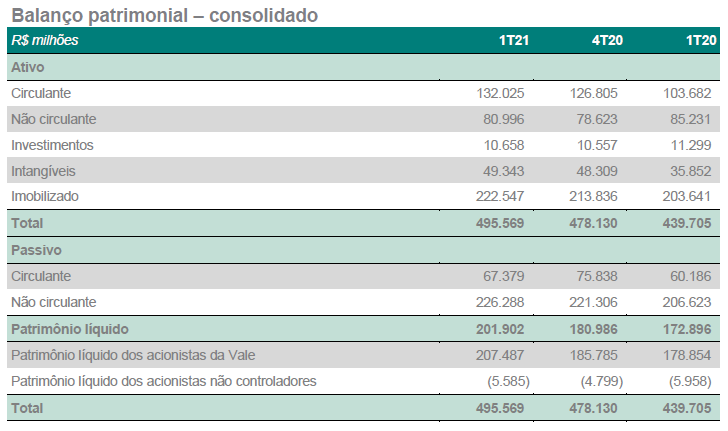

In [11]:
from IPython.display import Image
Image('/content/gdrive/MyDrive/datasets/images/balanco_patrimonial_vale.PNG')

### extract_text()

No fim das contas, estamos interessados mesmo é no conteúdo do nosso arquivo, e isso também pode ser facilmente extraído utilizando o pdfplumber, através da função `extract_text()` que funciona no nível da página. Com essa função é possível extrair dados de arquivos gerados com frequencia e que possuem um certo padrão e incluí-los em algum processo automatizado.

Aqui, precisamos ter extraído a página que iremos trabalhar, neste caso a 16, e vamos associar a uma variável o resultado da execução da função `extract_text()` sobre a página. Depois, é só imprimir.

In [13]:
# extraindo o texto da página 16
page16 = pdf.pages[15]
page16Text = page16.extract_text()
page16Text

' \nBalanço patrimonial – consolidado       \nR$ milhões  1T21  4T20  1T20 \nAtivo       \nCirculante  132.025  126.805  103.682 \nNão circulante  80.996  78.623  85.231 \nInvestimentos  10.658  10.557  11.299 \nIntangíveis  49.343  48.309  35.852 \nImobilizado  222.547  213.836  203.641 \nTotal   495.569  478.130  439.705 \nPassivo       \nCirculante  67.379  75.838  60.186 \nNão circulante  226.288  221.306  206.623 \nPatrimônio líquido  201.902  180.986  172.896 \nPatrimônio líquido dos acionistas da Vale  207.487  185.785  178.854 \nPatrimônio líquido dos acionistas não controladores  (5.585)  (4.799)  (5.958) \nTotal  495.569  478.130  439.705 \n       \n       \n       \n       \n       \n       \n       \n       \n \n \n  16                                           \n '

### extract_table()

Com a função `extract_table` é possível extrair os dados que estão estruturados no formato de tabela. Podemos aplicar a função e guardar os dados dentro da variável `table`.

In [14]:
table = page16.extract_table()
table

[['Balanço patrimonial – consolidado', '', '', ''],
 ['R$ milhões', '1T21', '4T20', '1T20'],
 ['Ativo', '', '', ''],
 ['Circulante', '132.025', '126.805', '103.682'],
 ['Não circulante', '80.996', '78.623', '85.231'],
 ['Investimentos', '10.658', '10.557', '11.299'],
 ['Intangíveis', '49.343', '48.309', '35.852'],
 ['Imobilizado', '222.547', '213.836', '203.641'],
 ['Total', '495.569', '478.130', '439.705'],
 ['Passivo', '', '', ''],
 ['Circulante', '67.379', '75.838', '60.186'],
 ['Não circulante', '226.288', '221.306', '206.623'],
 ['Patrimônio líquido', '201.902', '180.986', '172.896'],
 ['Patrimônio líquido dos acionistas da Vale',
  '207.487',
  '185.785',
  '178.854'],
 ['Patrimônio líquido dos acionistas não controladores',
  '(5.585)',
  '(4.799)',
  '(5.958)'],
 ['Total', '495.569', '478.130', '439.705']]

Agora vamos converter os dados vindos da tabela em um DataFrame. Podemos notar que toda estrutura é mantida no mesmo padrão disposto no arquivo PDF.

In [15]:
df = pd.DataFrame(table[2:], columns=table[1])
df

,R$ milhões,1T21,4T20,1T20
0,Ativo,,,
1,Circulante,132.025,126.805,103.682
2,Não circulante,80.996,78.623,85.231
3,Investimentos,10.658,10.557,11.299
4,Intangíveis,49.343,48.309,35.852
5,Imobilizado,222.547,213.836,203.641
6,Total,495.569,478.130,439.705
7,Passivo,,,
8,Circulante,67.379,75.838,60.186
9,Não circulante,226.288,221.306,206.623


Agora, vamos extrair o arquivo no formato Excel e depois carrega-lo novamente para verificar se a estrutura se manteve.

In [16]:
# Extraindo arquivo Excel
df.to_excel('/content/gdrive/MyDrive/extractions/excel/desempenho_da_vale.xlsx', index=False)

In [17]:
# verificando a extração do arquivo
!ls '/content/gdrive/MyDrive/extractions/excel/'

desempenho_da_vale.xlsx


In [18]:
# abrindo o documento
pd.read_excel("/content/gdrive/MyDrive/extractions/excel/desempenho_da_vale.xlsx")

,R$ milhões,1T21,4T20,1T20
0,Ativo,NaN,NaN,NaN
1,Circulante,132.025,126.805,103.682
2,Não circulante,80.996,78.623,85.231
3,Investimentos,10.658,10.557,11.299
4,Intangíveis,49.343,48.309,35.852
5,Imobilizado,222.547,213.836,203.641
6,Total,495.569,478.130,439.705
7,Passivo,NaN,NaN,NaN
8,Circulante,67.379,75.838,60.186
9,Não circulante,226.288,221.306,206.623


Estas são algumas das inúmeras possibilidades desta maravilhosa biblioteca de manipulação de dados em PDF. Muitas outras coisas podem ser feitas e a documentação oficial poderá nos ajudar. Espero que tenham gostado desta passagem rápida de algumas funcionalidades.

Para continuar acompanhando novos projetos que irei postar futuramente, basta acompanhar o meu perfil no [GitHub](https://github.com/welricsson). Fiz um projeto de análise exploratória dos dados do [Airbnb](https://bit.ly/2LrIaI7) que está bem interessante.